In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data_pro.csv', index_col=0)

In [3]:
data

,statement,status,cleaned_text,word_count,sentiment_score,cluster
id,,,,,,
0,oh my gosh,Anxiety,oh gosh,2,0.000000,1
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,7,-0.300000,1
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,wrong back dear forward doubt stay restless re...,9,-0.250000,1
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted focus something else im still worried,8,0.000000,0
4,"I'm restless and restless, it's been a month n...",Anxiety,im restless restless month boy mean,6,-0.312500,0
...,...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,nobody takes seriously ive dealt depressionanx...,174,0.140521,0
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,selfishness dont feel good like dont belong wo...,99,-0.015006,0
53040,Is there any way to sleep better? I can't slee...,Anxiety,way sleep better cant sleep nights meds didnt ...,9,0.500000,1


In [4]:
data['status'].value_counts(normalize=True)

status
Normal                  0.308259
Depression              0.290406
Suicidal                0.200837
Anxiety                 0.073299
Bipolar                 0.054239
Stress                  0.050318
Personality disorder    0.022642
Name: proportion, dtype: float64

In [5]:
unique_words = {}

for status, group in data.groupby('status'):
    words = {}
    
    for _, row in group.iterrows():
        cleaned_text = row['cleaned_text']
        
        if isinstance(cleaned_text, str):
            
            statement_words = cleaned_text.split(' ')
            
            for word in statement_words:
                if word != '':
                    if word in words:
                        words[word] += 1
                    else:
                        words[word] = 1
    
    unique_words[status] = words

In [6]:
unique_words

{'Anxiety': {'oh': 82,
  'gosh': 5,
  'trouble': 75,
  'sleeping': 81,
  'confused': 47,
  'mind': 411,
  'restless': 318,
  'heart': 1150,
  'tune': 2,
  'wrong': 380,
  'back': 1265,
  'dear': 6,
  'forward': 88,
  'doubt': 42,
  'stay': 118,
  'place': 134,
  'ive': 2705,
  'shifted': 4,
  'focus': 119,
  'something': 1265,
  'else': 621,
  'im': 6092,
  'still': 854,
  'worried': 682,
  'month': 350,
  'boy': 28,
  'mean': 114,
  'every': 761,
  'break': 78,
  'must': 86,
  'nervous': 280,
  'like': 3269,
  'heck': 11,
  'feel': 2282,
  'scared': 638,
  'anxious': 777,
  'may': 197,
  'family': 304,
  'us': 111,
  'protected': 3,
  'ever': 423,
  'felt': 684,
  'didnt': 626,
  'know': 1851,
  'havent': 316,
  'slept': 40,
  'well': 503,
  'days': 783,
  'huh': 10,
  'really': 1603,
  'want': 859,
  'cry': 78,
  'always': 720,
  'night': 519,
  'even': 1220,
  'though': 407,
  'dont': 2047,
  'whats': 147,
  'strange': 93,
  'feeling': 1169,
  'good': 463,
  'lately': 195,
  'time':

In [10]:
import matplotlib.pyplot as plt

['im', 'like', 'want', 'dont', 'get', 'really', 'time', 'go', 'one', 'know', 'good', 'day', 'people', 'would', 'work', 'going', 'still', 'think', 'back', 'got']


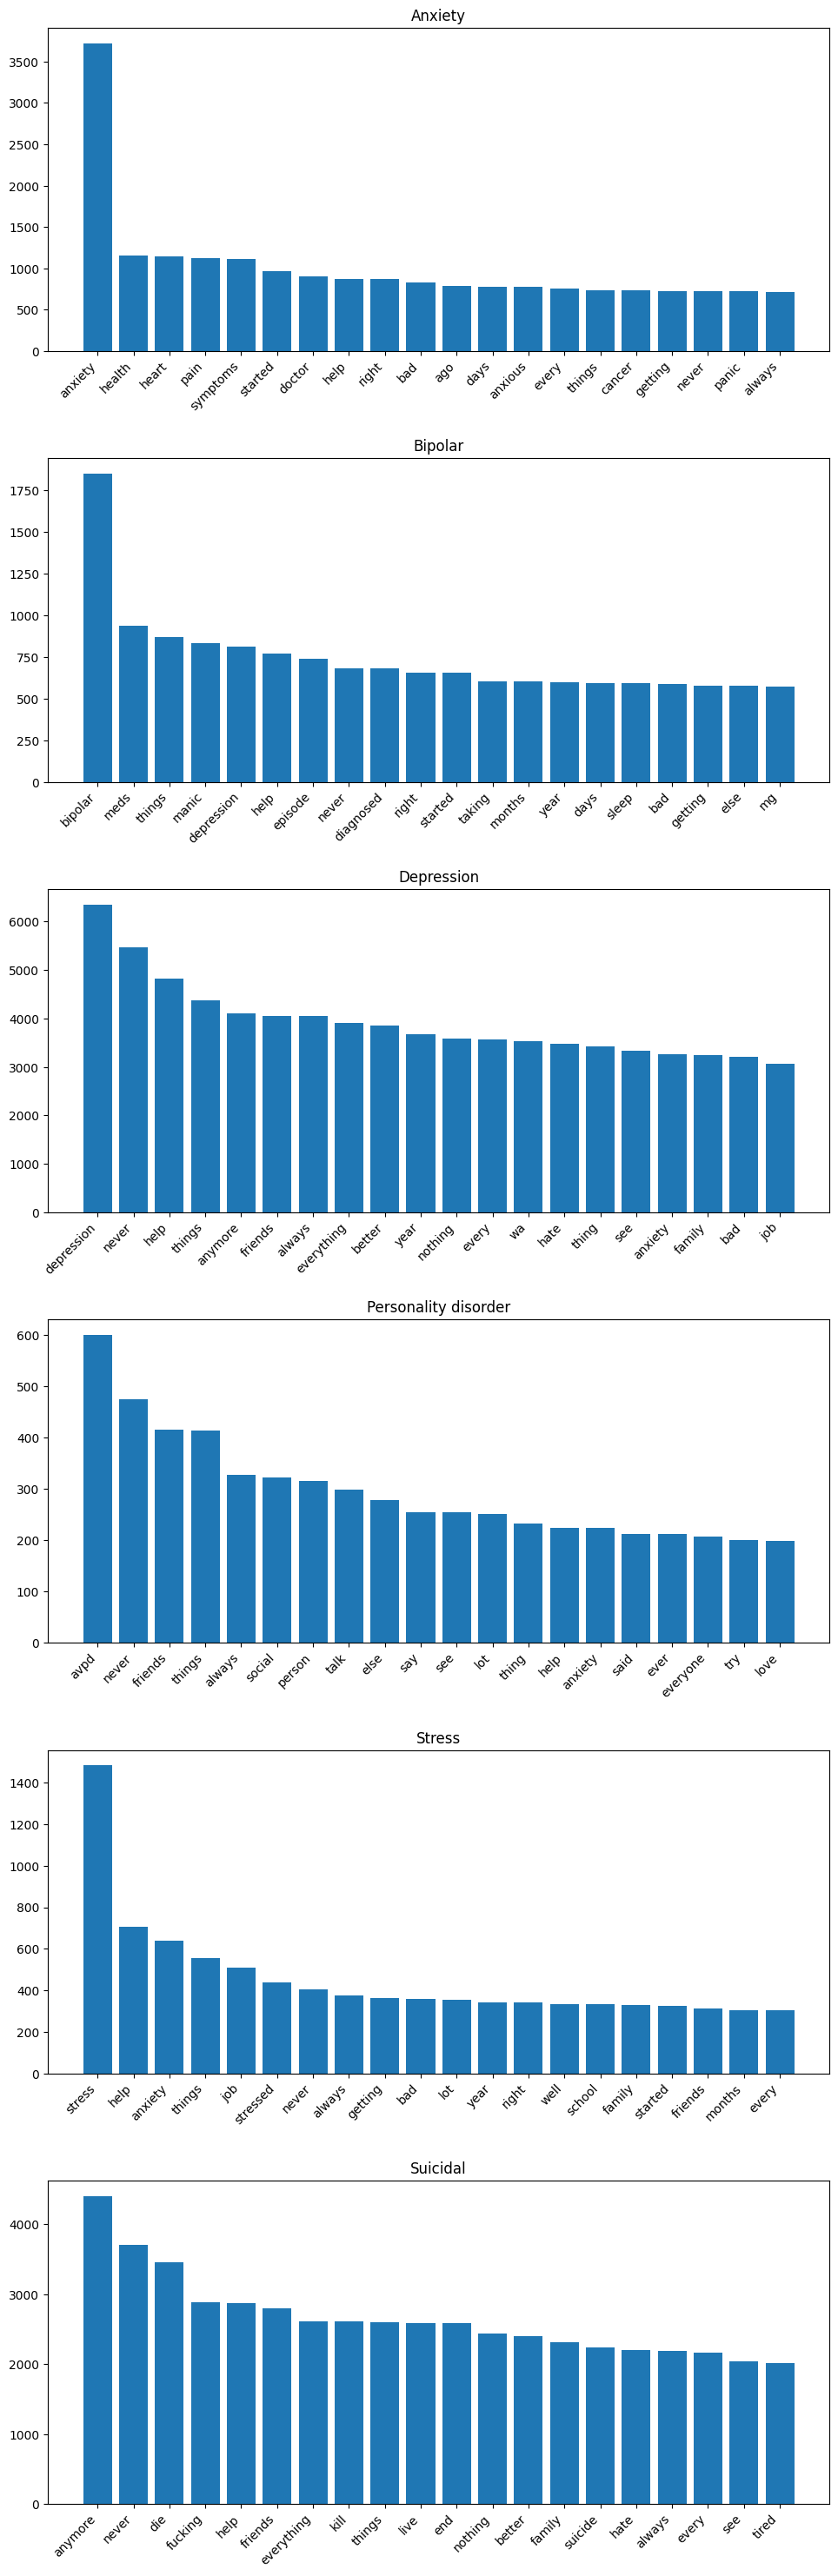

In [47]:
top = 20

categories = len(unique_words)-1

fig, axs = plt.subplots(categories, 1, figsize=(10,5*categories))

top_normal_words = sorted(unique_words['Normal'].items(), key=lambda x: x[1], reverse=True)[:top]
top_normal_words = [w[0] for w in top_normal_words]

forbidden = ['ive', 'also', 'could','also','make','feel','feeling','even','much','take','years','since','life','need',
             'anything','anyone','way','something','someone','cant','cannot','last','went','didnt']

print(top_normal_words)

idx = 0
for cat, uw in unique_words.items():
    
    if cat == 'Normal':
        continue
    
    ordered = sorted(uw.items(), key=lambda x: x[1], reverse=True)
    
    ordered = [o for o in ordered if o[0] not in top_normal_words+forbidden][:top]

    axs[idx].bar([o[0] for o in ordered], [o[1] for o in ordered])
    axs[idx].set_xticks(range(top), axs[idx].get_xticklabels())
    axs[idx].set_xticklabels(axs[idx].get_xticklabels(), rotation=45, ha='right')
    axs[idx].set_title(cat)
    idx+=1
fig.tight_layout(pad=2.0)
plt.show()


In [49]:
for cat, uw in unique_words.items():
    ordered = sorted(uw.items(), key=lambda x: x[1], reverse=True)
    
    print(len(ordered))

15556
15000
40860
22291
8202
11577
30721


In [53]:
rows = []

for status in unique_words.keys():
    for word, count in unique_words[status].items():
        if word not in top_normal_words + forbidden:
            rows.append([status, word, count])

In [54]:
len(rows)

143906

In [55]:
pd.DataFrame(rows, columns=['status', 'word', 'count']).to_csv('records_counts.csv')